# 1.Importing Libraries

In [465]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# 2.Load Dataset

In [466]:
name = ['sepal-length','sepal-width','petal-length','petal-width','class']
dataset = read_csv('Iris.csv', header=0, names=name)

# 3.Summarizing Dataset

## 3.1 Dimensions of Dataset

In [467]:
print(dataset.shape)

(150, 5)


## 3.2 Displaying Data

In [468]:
print(dataset.head(10))

    sepal-length  sepal-width  petal-length  petal-width        class
1            5.1          3.5           1.4          0.2  Iris-setosa
2            4.9          3.0           1.4          0.2  Iris-setosa
3            4.7          3.2           1.3          0.2  Iris-setosa
4            4.6          3.1           1.5          0.2  Iris-setosa
5            5.0          3.6           1.4          0.2  Iris-setosa
6            5.4          3.9           1.7          0.4  Iris-setosa
7            4.6          3.4           1.4          0.3  Iris-setosa
8            5.0          3.4           1.5          0.2  Iris-setosa
9            4.4          2.9           1.4          0.2  Iris-setosa
10           4.9          3.1           1.5          0.1  Iris-setosa


## 3.3 Statistical Summary 

In [469]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


# 4.Data Visualizaton

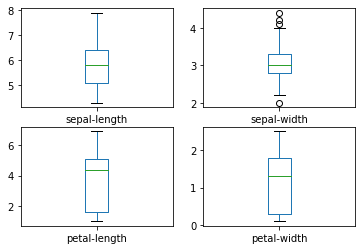

In [470]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

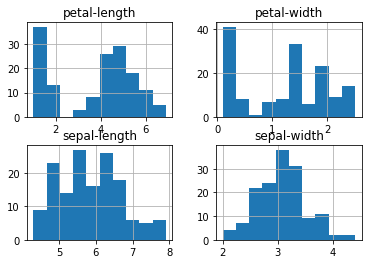

In [471]:
dataset.hist()
pyplot.show()

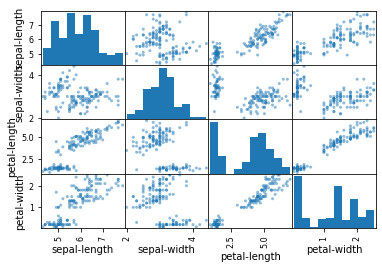

In [472]:
scatter_matrix(dataset)
pyplot.show()

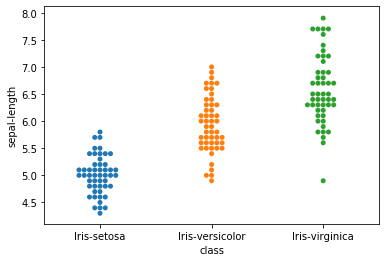

In [473]:
sns.swarmplot(x = 'class', y = 'sepal-length', data=dataset)
pyplot.show()

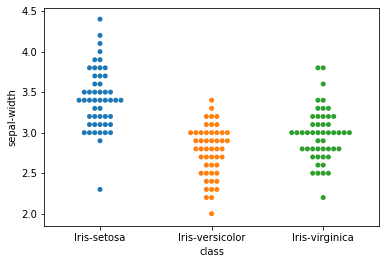

In [474]:
sns.swarmplot (x = 'class', y = 'sepal-width', data=dataset)
pyplot.show()

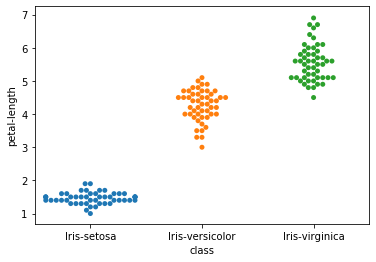

In [475]:
sns.swarmplot (x='class', y='petal-length', data=dataset)
pyplot.show()

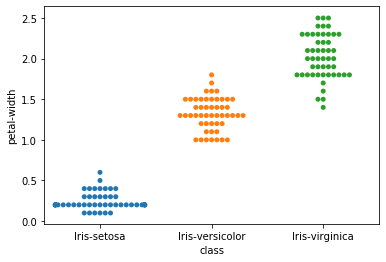

In [476]:
sns.swarmplot (x='class', y='petal-width', data=dataset)
pyplot.show()

# Evaluating Models 

## Splitting Data into Train and Test sets

In [477]:
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.3, random_state=None)

## Testing Different Algorithms

### Support Vector Machines SVM 

In [478]:
model_SVM = SVC()
model_SVM.fit(X_train, Y_train)
prediction = model_SVM.predict(X_validation)
print('The accuracy of the SVM is: ', accuracy_score(prediction, Y_validation))

The accuracy of the SVM is:  0.9555555555555556


### Logistic Regression 

In [479]:
model_LR = LogisticRegression()
model_LR.fit(X_train, Y_train)
prediction = model_LR.predict(X_validation)
print('The accuracy of Logistic Regression is: ', accuracy_score(prediction, Y_validation))

The accuracy of Logistic Regression is:  0.9333333333333333


C:\Users\RIZWAN ASLAM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Decision Tree 

In [480]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, Y_train)
prediction = model_DT.predict(X_validation)
print('The accuracy of Decision Tree is: ',accuracy_score(prediction, Y_validation))

The accuracy of Decision Tree is:  0.9333333333333333


### K-Nearest Neighbors

#### Finding the best n value 

In [481]:
for i in list(range(1,11)):
    model_KNN = KNeighborsClassifier(n_neighbors=i)
    model_KNN.fit(X_train, Y_train)
    prediction = model_KNN.predict(X_validation)
    print(accuracy_score(prediction, Y_validation))

0.9111111111111111
0.9111111111111111
0.9333333333333333
0.9333333333333333
0.9333333333333333
0.9555555555555556
0.9555555555555556
0.9555555555555556
0.9555555555555556
0.9555555555555556


#### Selecting the Algorithm with value of n = 6

In [485]:
model_KN = KNeighborsClassifier(n_neighbors=6)
model_KN.fit(X_train, Y_train)
prediction = model_KN.predict(X_validation)
print('The accuracy of KNN is: ', accuracy_score(prediction, Y_validation))

The accuracy of KNN is:  0.9555555555555556


# Make Predictions

## Selecting SVM model as per above evaluation

In [492]:
model = SVC()
model.fit(X_train, Y_train)
prediction = model.predict(X_validation)
print('The accuracy of the SVM is: ', accuracy_score(prediction, Y_validation))

The accuracy of the SVM is:  0.9555555555555556


## Evaluating Predictions 

In [493]:
print(accuracy_score(Y_validation, prediction))
print(confusion_matrix(Y_validation, prediction))
print(classification_report(Y_validation, prediction))

0.9555555555555556
[[17  0  0]
 [ 0 15  1]
 [ 0  1 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45

